# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(12859, 12859)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-04-13 17:43:47,liquid,bitbank,BTC/JPY,0.006,24
1,2021-04-13 17:43:53,bitbank,liquid,BTC/JPY,0.006,27
2,2021-04-13 17:44:12,bitbank,liquid,BTC/JPY,0.006,29
3,2021-04-13 17:45:29,liquid,bitbank,BTC/JPY,0.006,5
4,2021-04-13 17:46:16,bitbank,liquid,BTC/JPY,0.006,15
...,...,...,...,...,...,...
623,2021-04-14 04:38:44,liquid,bitbank,BTC/JPY,0.006,-96
624,2021-04-14 04:39:58,bitbank,liquid,BTC/JPY,0.006,104
625,2021-04-14 04:40:04,liquid,bitbank,BTC/JPY,0.006,-96
626,2021-04-14 04:40:22,bitbank,liquid,BTC/JPY,0.006,99


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-04-13 17:43:47,liquid,買い,6838834.0
1,2021-04-13 17:43:47,bitbank,売り,6842836.0
2,2021-04-13 17:43:53,bitbank,買い,6841379.0
3,2021-04-13 17:43:53,liquid,売り,6845994.0
4,2021-04-13 17:44:12,bitbank,買い,6840011.0
...,...,...,...,...
1251,2021-04-14 04:40:04,bitbank,売り,6843357.0
1252,2021-04-14 04:40:22,bitbank,買い,6843439.0
1253,2021-04-14 04:40:22,liquid,売り,6860009.0
1254,2021-04-14 04:41:57,liquid,買い,6860100.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                12859
           取引回数                  628
           開始日時  2021-04-13 17:43:35
           終了日時  2021-04-14 04:42:07
        取引時間[H]      0 days 10:58:32
      取引単位[BTC]                0.006
  利確しきい値[JPY]                14508
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      13216
利益[JPY]       3216
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]   160790
終了[TOTAL]   164006
利益[TOTAL]  3216.34
-----------  -------


## グラフ出力

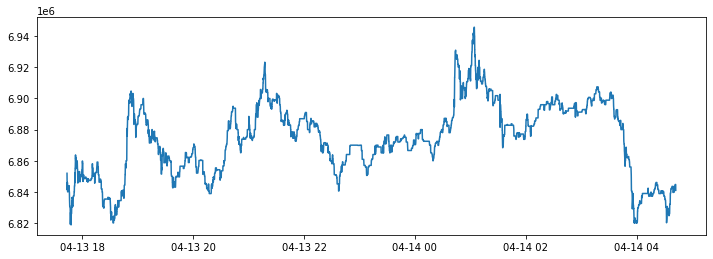

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

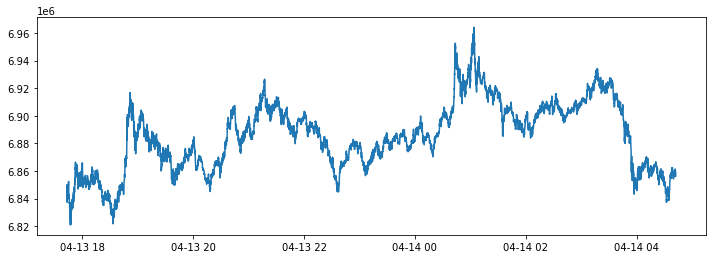

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-04-13 17:40:00,985,-3926,6834723,6838649,6836467,6835482
2021-04-13 17:50:00,3077,-5405,6850366,6855771,6853965,6850888
2021-04-13 18:00:00,3718,-5565,6848825,6854390,6852797,6849079
2021-04-13 18:10:00,2359,-4388,6851866,6856254,6854622,6852263
2021-04-13 18:20:00,5170,-6854,6836247,6843101,6841649,6836480
...,...,...,...,...,...,...
2021-04-14 04:00:00,26325,-27984,6834260,6862245,6860835,6834510
2021-04-14 04:10:00,23183,-24605,6838992,6863598,6862309,6839126
2021-04-14 04:20:00,16212,-17868,6841183,6859051,6857602,6841390
